In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as intr

##### Cada pregunta tiene 20 puntos y el informa tiene una base de 10 puntos. Nota final: (P1 +P2 +P3)/10

### Pregunta 1: El largo y la energía:
Para un mismo estado grafique la función de onda en una caja de largo 1 Bohr, 0.5 Bohr y 0.1 Bohr. Además dibuje una linea verical en el extrema de cada una de la caja. Cómo se diferencian las distintas funciones de onda? Explique su resultado en base al principio de incertidumbre de Heissenberg y de la expresión de energía de la partícula en una caja. 

#### Respuesta:

In [2]:
def psi(x,n,L):
    return np.sqrt(2/L)*np.sin(n*np.pi*x/L)     # 3 Puntos

def psi_sq(x,n,L):
    return psi(x,n,L)**2

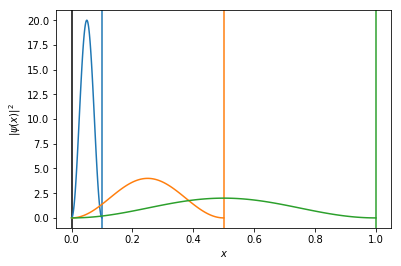

In [3]:
# Definiendo el largo de las cajas
l1 = 0.1
l2 = 0.5
l3 = 1.0
# definiendo la grilla de la gráfica para las respectivas cajas 
x1 = np.linspace(0,0.1,100)
x2 = np.linspace(0,0.5,100)
x3 = np.linspace(0,1.0,100)

# Graficar
plt.ylabel(r"$\|\psi(x)|^2$")
plt.xlabel(r"$x$")
plt.axvline(x=0.0,color='k')
plt.plot(x1,psi_sq(x1,1,0.1));   # 4 Puntos
plt.axvline(x=0.1,color='#1f77b4')
plt.plot(x2,psi_sq(x2,1,0.5));   # 4 Puntos
plt.axvline(x=0.5,color='#ff7f0e')
plt.plot(x3,psi_sq(x3,1,1.0));   # 4 Puntos
plt.axvline(x=1.0,color='#2ca02c')

A medida que se reduce el tamaño de la caja la densidad de probabilidad se hace cada vez más aguda, es decir tienes más curvatura por ende tiene más energía cinética. Esa observación concuerda con el principio de incertidumbre de Heissenberg ya que a medida que la caja se reduce en tamaño la posición está cada vez más determinanda lo que implica que la partícula debe tener mayor incertidumbre en el momento lineal y por ende un mayor momento lineal en promedio. (5 puntos)

### **Pregunta 2: Superposición**
Grafíque tres funciones de onda en el mismo gráfico. La función de onda para n = 1, n = 2 y la superposición 
entre los dos estados con $c_1 = c_2 = 1/\sqrt{2}$. En otro gráfico grafíque la denisdad de probabilidad. Qué espera que suceda  con el valor esperado de la posición, si la particula se encuentra en esta superposición?  Verifique su suposición utlizando integración numérica.

In [4]:
def psi_sup(x,n1,n2,L):
    c1 = 1/np.sqrt(2)
    c2 = 1/np.sqrt(2)
    return c1*psi(x,n1,L)+c2*psi(x,n2,L)    # 2 puntos

def psi_sup_sq(x,n1,n2,L):
    return psi_sup(x,n1,n2,L)**2


#### Respuesta:

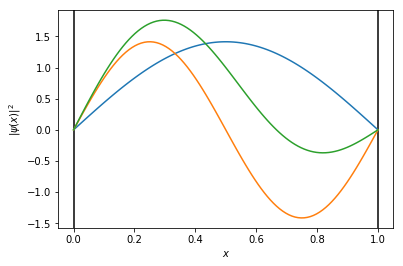

In [5]:
# Primero las distintas funciones de onda y la superposición
n1 = 1
n2 = 2
L = 1.0
# definiendo la grilla de la gráfica para las respectivas cajas 
x = np.linspace(0,L,100)


# Graficar
plt.ylabel(r"$\|\psi(x)|^2$")
plt.xlabel(r"$x$")
plt.axvline(x=L,color='k')
plt.axvline(x=0.0,color='k')

plt.plot(x,psi(x,1,L));  
plt.plot(x,psi(x,2,L));   
plt.plot(x,psi_sup(x3,1,2,L));      # 4 Puntos

Text(0.5,0,'$x$')

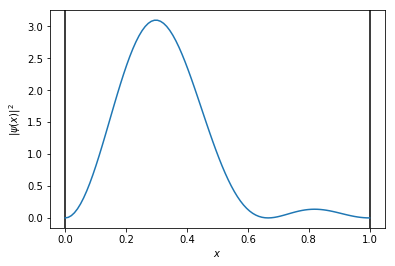

In [6]:
L = 1.0
x2 = np.linspace(0,L,100)
plt.axvline(x=L,color='k')
plt.axvline(x=0.0,color='k')
plt.plot(x2,psi_sup_sq(x2,1,2,L), label=r'$\psi_12(x)') # 8 Puntos
plt.ylabel(r"$\|\psi(x)|^2$")
plt.xlabel(r"$x$")


Se puede ver que al estar en una superposición de estados definidos, se rompe la simetria con respecto al centro
del caja y se encuentra que la partícula tiene mayor densidad de probabilidad entre 0 < x < 0.5 que en el resto
de la caja, por lo tanto el valor esperado de la posición debería estar   en esa región de la caja.

In [7]:
# Primero se debe definir la función del valor esperado:
def valor_esp_psi_sup(x, n1, n2, L):
    return psi_sup(x,n1,n2,L) * x * psi_sup(x,n1,n2,L)    # 4 Puntos

In [8]:
# Ahora se puede integrar esta función en el intervalo de la caja.  
vesp = intr.quad(valor_esp_psi_sup, 0, L, args=(1,2,L))
print("El valor esperado es: ", vesp[0])     # 4 Puntos

('El valor esperado es: ', 0.31987345130251066)


### **Pregunta 3: PEC 2-D y 3-D**
a) Cuál es el significado físico de las lineas de contorno? 

b) Donde y por qué espera que su valor sea mayor y donde menor? 

**Bonus:**

c) Para el estado nx=1, ny=2, nz=3 visualice las distintas isosuperficie desde 0.01 hasta 3.5. Que tendencia observa? Explique lo que es una hipersuperficie y justifique la tendencia con el conocimiento que tiene sobre la PEC.

d) Cuantos nodos tiene la función de onda de c) ?

e) Cambia el número de nodos cuando se varía la isosuperficie?


#### Respuesta

a) Las lineas de controno en la PEC-2D representa regiones en el plano en las cual la densidad de probabilidad tiene un valor específico. (10 puntos)

b) Para todos los estados el valor debería ser más pequeño para lineas de contorno que están más cercanas a las paredes de la caja ya que para todos los estados la función de onda y consquentemente la densidad de probabilidad debe ser  0 en los extremos de la caja para cumplir con la condición de continuidad de la función de onda. En tanto la ubicación de las  lineas  de contorno con valores alto dependerá de los dos números cuánticos n_X y n_y tal que para números cuańticos impares se encontran cerca del centro de la caja y para números pares habrá un plano nodal que atraviesa el centro por lo que las lineas de contron grandes se encontrarn ubicadas en los centros de los cuartos de la caja.  (10 puntos)

#### Bonus
Como se puede ver en la imágen, para valores de la isosuperfice que son más pequeños, la isosuperficie es más cuadrada y muy cercana a las paredes de la caja, mientras que para valores más alto, la isosuperficie se acerca a los centros de los distintos basines de densidad. En el caso n_x =1, n_y=2, n_z = 3 en total del planos nodales es 3. Claramente la cambiar la isosuperfice también se modifica el número de planos nodales. 

In [9]:
from IPython.display import Image
Image(url="https://bit.ly/2AAo74m")  # 10 puntos

![]("https://raw.githubusercontent.com/QCMM/fq3_lab/master/TP01/iso_surface.png")